In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from problema1.process_image import process_image, four_point_transform
from imutils import opencv2matplotlib
%matplotlib inline

In [2]:
PATH = 'data/placas'
SAVE_PATH = 'problema1/data/save.npy'
IMG_WIDTH = 200

data = np.load(SAVE_PATH).item()
files = list(data)

for file in files:
    if data[file]['box'] is None:
        data.pop(file)

files = list(data)
n_files = len(data)
hard_files = np.sum([data[d]['hard'] for d in data])

print(f'Marked files: {n_files}')
print(f'Hard files: {hard_files}')

Marked files: 126
Hard files: 26


In [3]:
def show_img(img, size=(16,5)):
    plt.figure(figsize=size)
    plt.imshow(opencv2matplotlib(img))
    plt.axis('off')
    plt.show()
    print(img.shape[:2])

def get_plate(filename):
    img = cv2.imread(filename)
    box = data[filename]['box']
    plate = four_point_transform(img, box)
    h, w = plate.shape[:2]
    h = IMG_WIDTH * h // w
    plate = cv2.resize(plate, (IMG_WIDTH, h))
    
    return plate

def get_image(hard=False):
    while True:
        file = random.choice(files)
        if data[file]['hard'] == hard:
            return file

def plot_histogram(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()
    
# def threshold(img):
    

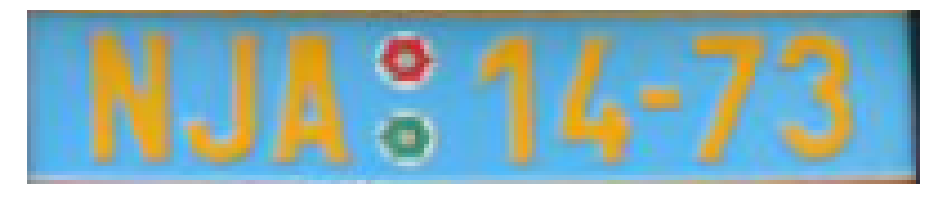

(39, 200)


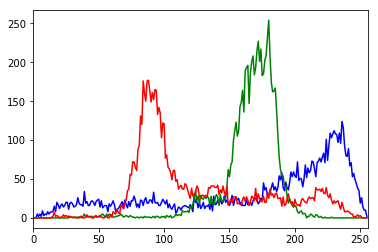

154.621239316
171.256923077 166.394871795 126.211923077


(True, True)

In [16]:
file = get_image(hard=True)
plate = get_plate(file)
show_img(plate)
plot_histogram(plate)
print(np.mean(plate))
b, g, r = np.mean(plate, (0,1))
print(b, g, r)
b > r+10, g > r+10

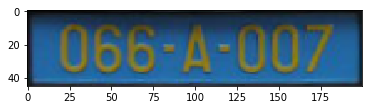

In [42]:
plate *= 255
plt.imshow(opencv2matplotlib(plate))

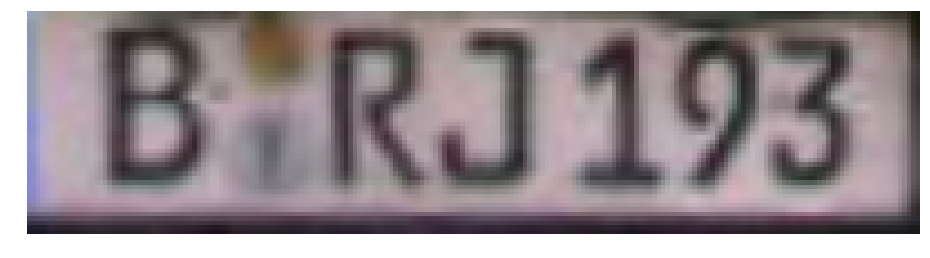

(50, 200)
(50, 200)


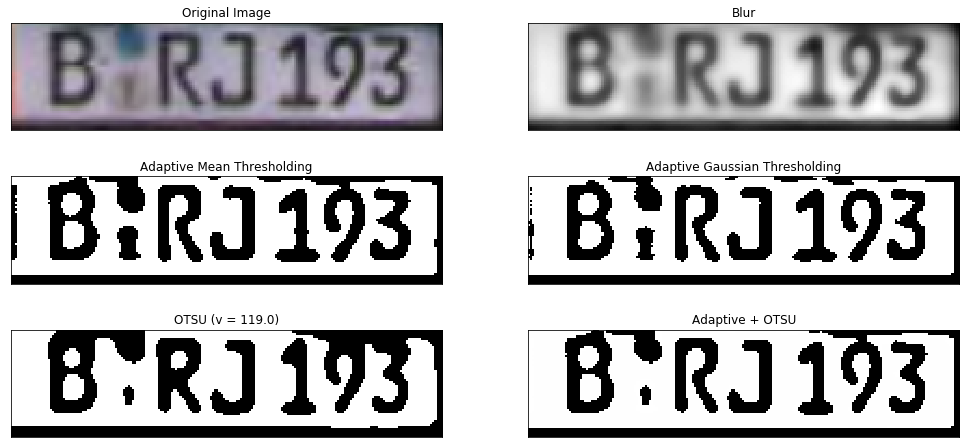

In [43]:
file = get_image(hard=True)
plate = get_plate(file)
show_img(plate)
b, g, r = np.mean(plate, (0,1))
if b > r+10 and g > r+10:
    plate *= 255
    
img = cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
# img = cv2.medianBlur(img, 3)
img = cv2.bilateralFilter(img,9,75,75)
th1 = img.copy()
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
ret4,th4 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th5 = th2 + th4

titles = ['Original Image', 'Blur',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding',
          f'OTSU (v = {ret4})', 'Adaptive + OTSU']
images = [plate, th1, th2, th3, th4, th5]

print(plate.shape[:2])
plt.figure(figsize=(17,8))
for i in range(6):
    plt.subplot(3,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

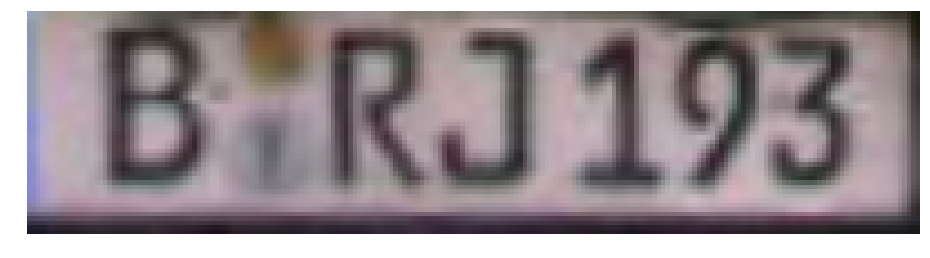

(50, 200)


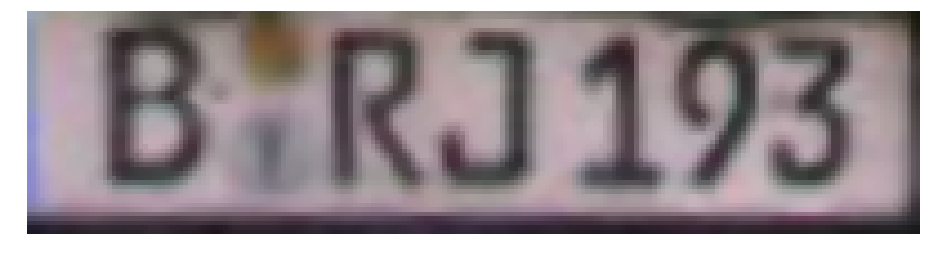

(50, 200)


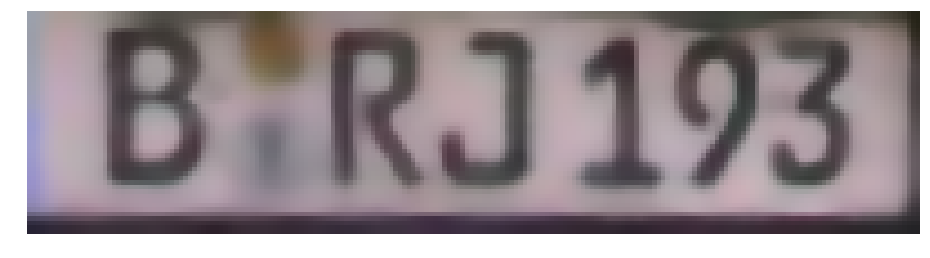

(50, 200)


In [21]:
file = get_image(hard=True)
plate = get_plate(file)
median = cv2.medianBlur(plate, 3)
bilateral = cv2.bilateralFilter(plate,9,75,75)

show_img(plate)
show_img(median)
show_img(bilateral)